# OBIS-SEAMAP Dataset

In [2]:
# Dataset: National Whale and Dolphin Sightings(Gözlemler) and Strandings(Karaya vurma) Database

# Scope: Whale and dolphin sightings in Australian waters, 1955–1999.

# Species covered: A wide range of marine mammals, particularly Cetacea (whales and dolphins) and some including Sirenia (sea cows) and Carnivora (seals).

# Data provider: OBIS (Ocean Biogeographic Information System), in collaboration with SEAMAP (Southeast Asia Mapping Project).

# Format: Shapefile (Geographic information system file format).

In [3]:
# dataset_id = The ID of dataset (Same)
# row_id = row ID(unique value)
# latitude = Information(in degrees) of the location where the observation was made.(Dünya üzerindeki bir noktanın kuzey-güney konumunu belirtir) 
# longitude = Information(in degrees) of the location where the observation was made.(Dünya üzerindeki bir konumun doğu-batı konumunu belirtir)
# species_name,scientific_name,common_name = The name of the species
# dtate_time = It indicates the exact date and time the observation made
# itis_tsn = A unique numeric identifier. Each species has an unique itis_tcn
# lprecision = It shows how precise the geographical coordinates(latitude/longitude) ==> same
# tprecision = It indicates the precision of the time data for each sighting ==> same
# oceano *** = A JSON field containing environmental measurements at the time and location of sightings. It contains;
#            ==> SST(Sea Surface Temperature)
#            ==> BATH(Bathymetry) (Deniz Derinliği)
#            ==> ZONE(Regional Areas)
# group_size,series_id,timezone ==> empty(NaN)

In [6]:
import numpy as np

In [8]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [14]:
import seaborn as sns

In [15]:
import plotly.express as px

In [16]:
df = pd.read_csv("C:/Users/user/OneDrive/Masaüstü/obis_seamap_dataset_103150567_points.csv")

In [18]:
df.head(3)

dataset_id            row_id   latitude   longitude  \
0   103150567  103150567_910513  -9.516666  147.166672   
1   103150567  103150567_910514 -20.366667  114.900002   
2   103150567  103150567_910515 -32.683334  115.599998   

             species_name         scientific_name           common_name  \
0    Pseudorca crassidens    Pseudorca crassidens    False Killer Whale   
1  Megaptera novaeangliae  Megaptera novaeangliae        Humpback Whale   
2     Eubalaena australis     Eubalaena australis  Southern Right Whale   

   itis_tsn  group_size  series_id            date_time  timezone ds_type  \
0    180463         NaN        NaN  1990-04-10 12:00:00       NaN   ptobs   
1    180530         NaN        NaN  1991-08-28 12:00:00       NaN   ptobs   
2    552771         NaN        NaN  1992-08-21 12:00:00       NaN   ptobs   

  platform                                           provider  lprecision  \
0  various  OBIS Secretariat, Intergovernmental Oceanograp...           6   
1  various  OBIS Secretariat, Intergovernmental Oceanograp...           6   
2  various  OBIS Secretariat, Intergovernmental Oceanograp...           6   

   tprecision                                             oceano  notes  \
0      111000  {"SST": {"PF51": {"YEAR": 27.3, "8DAYS": -9999...    NaN   
1      111000  {"SST": {"PF51": {"YEAR": 25.95, "8DAYS": 24.6...    NaN   
2      111000  {"SST": {"PF51": {"YEAR": 20.25, "8DAYS": -999...    NaN   

              last_mod  
0  2020-06-30 03:55:39  
1  2020-06-30 03:55:39  
2  2020-06-30 03:55:39

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dataset_id       1948 non-null   int64  
 1   row_id           1948 non-null   object 
 2   latitude         1948 non-null   float64
 3   longitude        1948 non-null   float64
 4   species_name     1948 non-null   object 
 5   scientific_name  1948 non-null   object 
 6   common_name      1948 non-null   object 
 7   itis_tsn         1948 non-null   int64  
 8   group_size       0 non-null      float64
 9   series_id        0 non-null      float64
 10  date_time        1948 non-null   object 
 11  timezone         0 non-null      float64
 12  ds_type          1948 non-null   object 
 13  platform         1948 non-null   object 
 14  provider         1948 non-null   object 
 15  lprecision       1948 non-null   int64  
 16  tprecision       1948 non-null   int64  
 17  oceano        

# Species Analysis

In [24]:
len(df["species_name"].unique()) # There are 31 unique species exist in the dataset

31

In [26]:
df["common_name"].unique()

array(['False Killer Whale', 'Humpback Whale', 'Southern Right Whale',
       'Minke Whale', 'Sperm Whale', 'Southern Bottlenose Whale',
       'pilot whales', 'Sei Whale', 'Dugong', 'Striped Dolphin',
       'Fin Whale', 'Hourglass Dolphin', 'Blue Whale',
       'Short-beaked Common Dolphin', 'dolphins', 'Killer Whale',
       'Common Bottlenose Dolphin', 'Long-finned Pilot Whale',
       'Dusky Dolphin', 'Melon-headed Whale', 'Pygmy Killer Whale',
       "Eden's whale", 'Southern Elephant Seal',
       'Short-finned Pilot Whale', 'Spinner Dolphin',
       "Cuvier's Beaked Whale", 'Southern Right Whale Dolphin',
       'Pygmy Sperm Whale', "Risso's Dolphin", 'baleen whales',
       'Pygmy Right Whale'], dtype=object)

In [28]:
df["groups"] = df["common_name"].apply(lambda type: "whale" if "Whale" in type else "dolphin" if "dolphins" or "Dolphin" in type
                                       else "other")                             

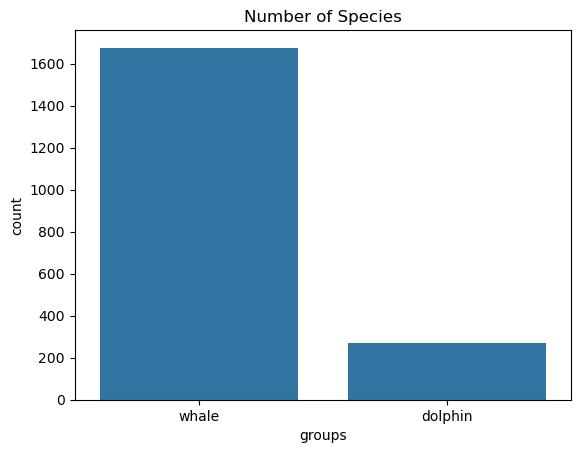

In [30]:
sns.countplot(x="groups",data=df) # There are 2 unique species in the dataset whales and dolphins
plt.title("Number of Species")
plt.show()

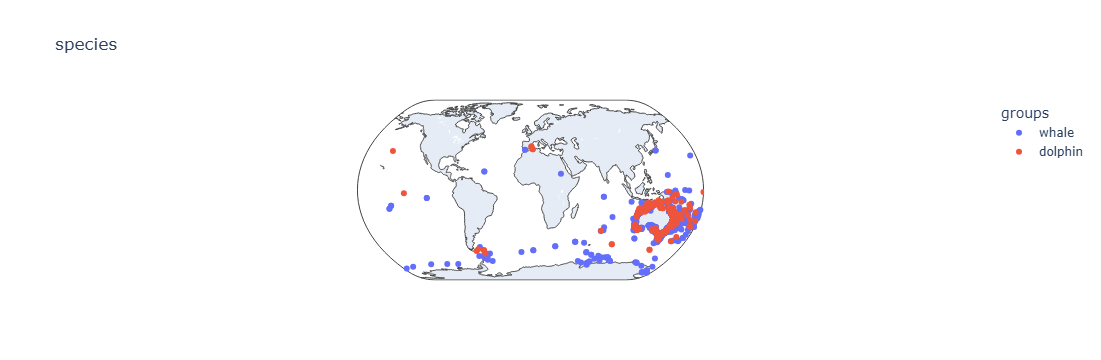

In [32]:
px.scatter_geo(lat="latitude",lon="longitude",color="groups",data_frame=df,projection="natural earth",
               title="species")

In [34]:
df["groups"].value_counts()

groups
whale      1676
dolphin     272
Name: count, dtype: int64

In [36]:
df["species_name"].value_counts().head(5) # The top 5 species frequently observed

species_name
Megaptera novaeangliae    917
Physeter macrocephalus    268
Eubalaena australis       256
Delphinidae                81
Globicephala               68
Name: count, dtype: int64

In [38]:
df["common_name"].value_counts().head(5) # Top 5 common names frequently observed

common_name
Humpback Whale          917
Sperm Whale             268
Southern Right Whale    256
dolphins                 81
pilot whales             68
Name: count, dtype: int64

In [40]:
df[df["species_name"] == "Megaptera novaeangliae"]["latitude"] # The most observed species in the dataset

1      -20.366667
3      -15.666667
4      -26.433332
5      -15.783334
8      -19.166666
          ...    
1936   -25.666666
1938   -17.183332
1939   -22.950001
1944   -19.850000
1946   -20.266666
Name: latitude, Length: 917, dtype: float64

<Axes: xlabel='latitude'>

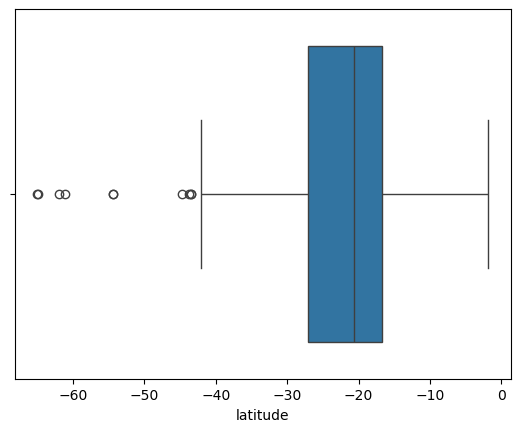

In [42]:
sns.boxplot(x=df[df["species_name"] == "Megaptera novaeangliae"]["latitude"],data=df)

In [44]:
df[df["species_name"] == "Megaptera novaeangliae"]["longitude"]

1       114.900002
3       120.550003
4       153.016663
5       123.966667
8       147.500000
           ...    
1936    153.000000
1938    121.783333
1939    151.783340
1944    149.116669
1946    148.716660
Name: longitude, Length: 917, dtype: float64

<Axes: xlabel='longitude'>

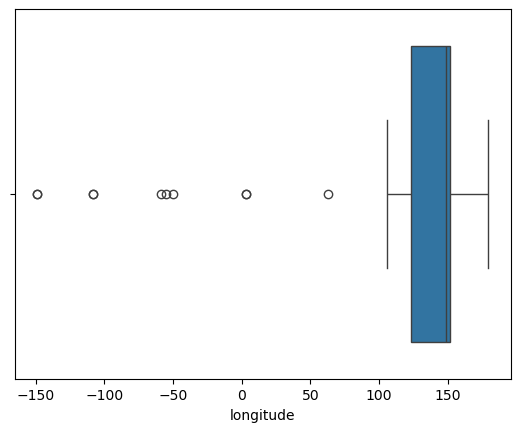

In [46]:
sns.boxplot(x=df[df["species_name"] == "Megaptera novaeangliae"]["longitude"],data=df)

In [48]:
df_humpback = df[df["species_name"]=="Megaptera novaeangliae"]

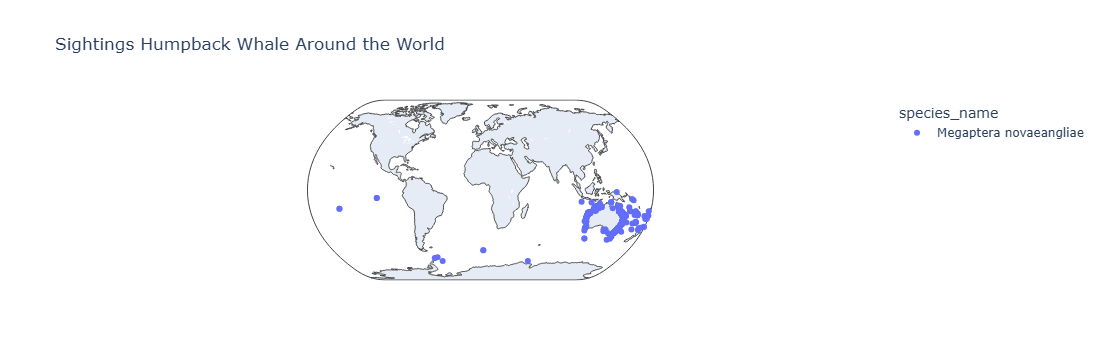

In [50]:
px.scatter_geo(lat="latitude",lon="longitude",color="species_name",data_frame=df_humpback,projection="natural earth",title="Sightings Humpback Whale Around the World")

In [52]:
# The species Megaptera novaeangliae(humpback whale) has been observed mostly in the western part of the Pacific Ocean.

# Time Analysis

In [54]:
df["timeStamp"] = pd.to_datetime(df["date_time"]) # convert string to datetime

In [56]:
a = df["timeStamp"].iloc[0]
a

Timestamp('1990-04-10 12:00:00')

In [58]:
df["timeStamp"].min() # The oldest record

Timestamp('1955-05-15 12:00:00')

In [60]:
df["timeStamp"].max() # The latest record

Timestamp('1999-08-09 12:00:00')

In [62]:
df["year"] = df["timeStamp"].apply(lambda year: year.year)

In [64]:
df["month"] = df["timeStamp"].apply(lambda month: month.month)

In [66]:
df["day"] = df["timeStamp"].apply(lambda day: day.day)

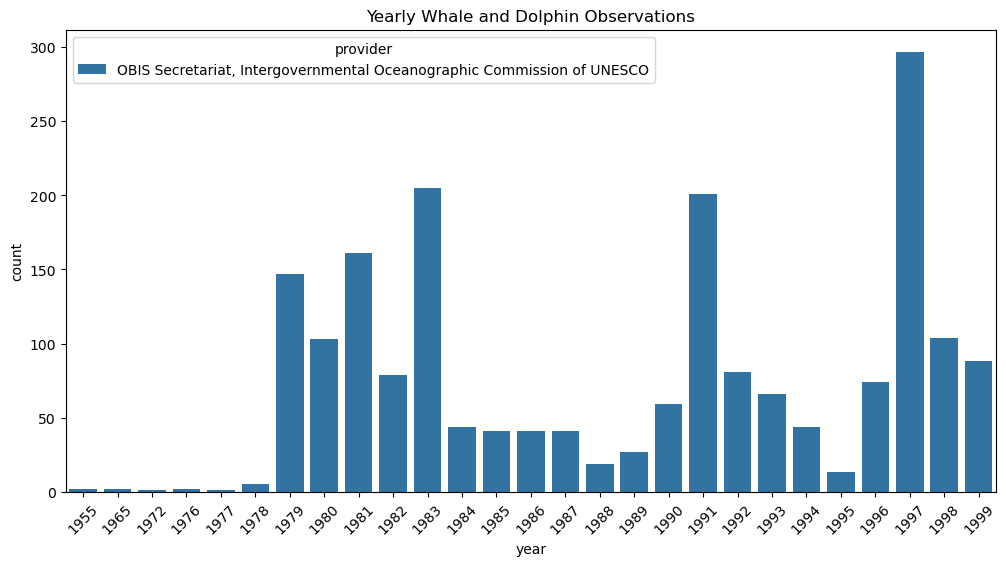

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(x="year",data=df,hue="provider")
plt.xticks(rotation=45)
plt.title("Yearly Whale and Dolphin Observations")
plt.show()

In [70]:
# The number of marine mammal sightings peaked in 1997, with noticeable increases in the early 1980s and early 1990s. 
# Most observations were contributed by the OBIS Secretariat.

In [72]:
dmap = {12:"Winter",1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",6:"Summer",7:"Summer",8:"Summer",
        9:"Fall",10:"Fall",11:"Fall"}

In [74]:
df["month"] = df["month"].map(dmap)

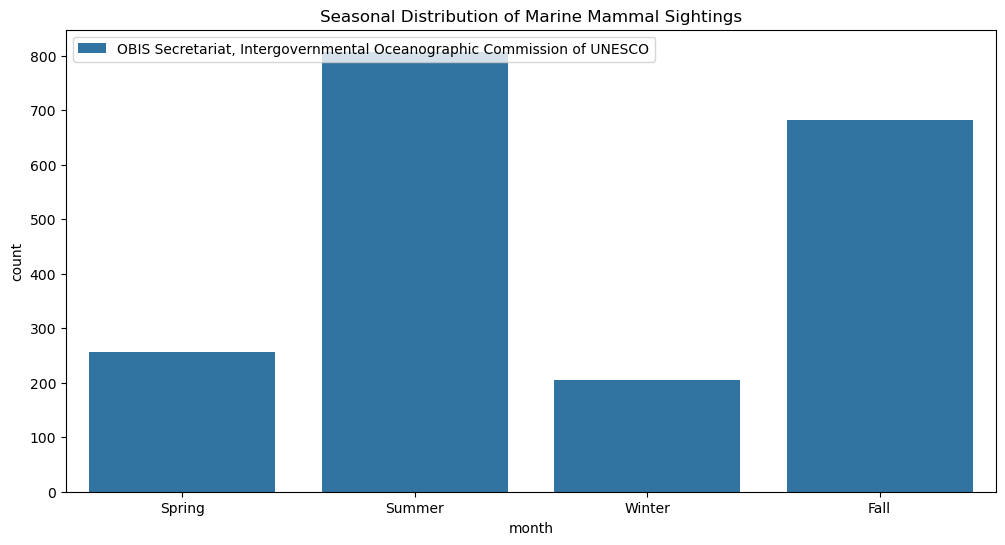

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x="month",data=df,hue="provider")
plt.title("Seasonal Distribution of Marine Mammal Sightings")
plt.legend(loc="upper left")
plt.show()

In [78]:
# Most marine mammal sightings occurred during the summer and fall seasons, with summer showing the highest observation count. 
# Winter and spring had significantly fewer observations, suggesting seasonal migration or observation bias.

In [80]:
len(df["itis_tsn"].unique())

31

# Geographical Observations

In [82]:
# For the tropical region: -23<latitude<23
# For the subtropical region: -50<latitude<-23 and 23<latitude<50
# For the Polar region: latitude<-50 or latitude>50

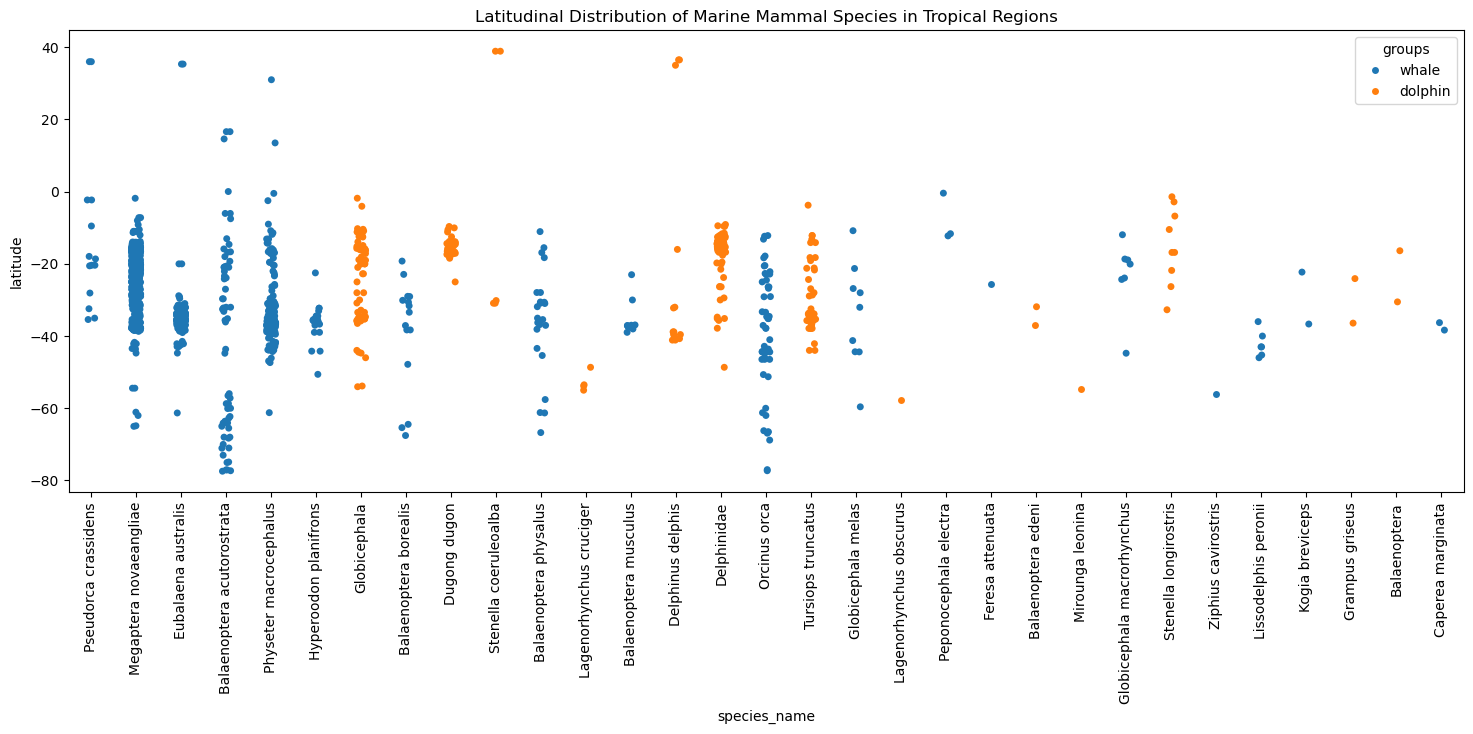

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(18,6))
sns.stripplot(x="species_name",y="latitude",data=df,hue="groups")
plt.xticks(rotation=90)
plt.title("Latitudinal Distribution of Marine Mammal Species in Tropical Regions")
plt.show()
plt.tight_layout()

In [86]:
tropical = df[(df["latitude"] > -23) & (df["latitude"] < 23)]

In [88]:
len(tropical["species_name"].value_counts()) # There are 20 species living in the subtropical region.

20

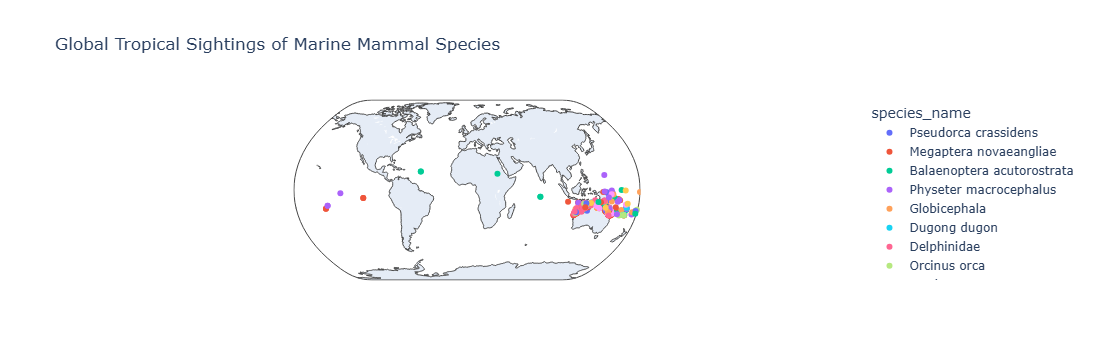

In [90]:
px.scatter_geo(lat="latitude",lon="longitude",color="species_name",data_frame=tropical,projection="natural earth",title="Global Tropical Sightings of Marine Mammal Species")

In [92]:
subtropical = df[((df["latitude"] > -50) & (df["latitude"] < -23)) | ((df["latitude"] < 50) & (df["latitude"] > 23))]

In [94]:
len(subtropical["species_name"].value_counts()) # There are 27 species living in the subtropical region.

27

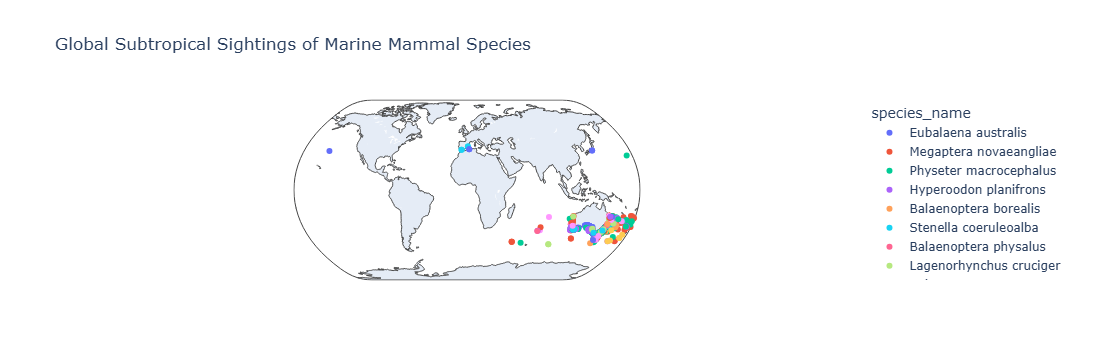

In [96]:
px.scatter_geo(lat="latitude",lon="longitude",color="species_name",data_frame=subtropical,projection="natural earth",title="Global Subtropical Sightings of Marine Mammal Species")

In [98]:
polar = df[(df["latitude"] < -50) | (df["latitude"] > 50)]

In [100]:
len(polar["species_name"].value_counts()) # There are 14 species living in the subtropical region.

14

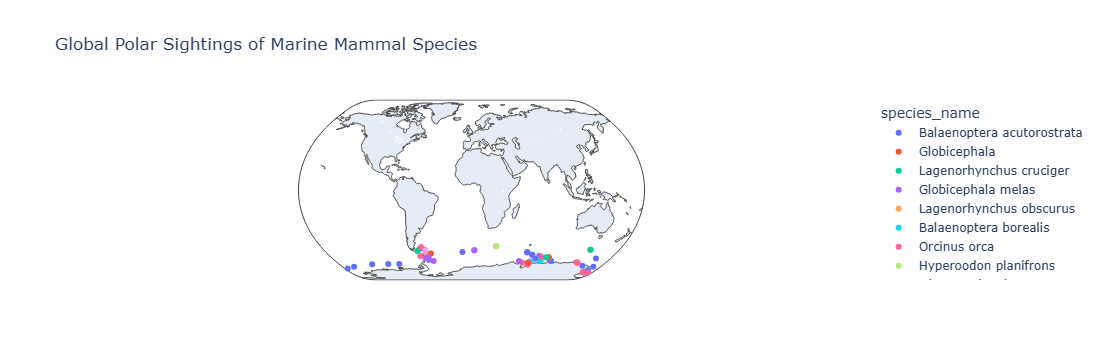

In [102]:
px.scatter_geo(lat="latitude",lon="longitude",color="species_name",data_frame=polar,projection="natural earth",
               title="Global Polar Sightings of Marine Mammal Species")

# oceano column

In [104]:
df["oceano"]

0       {"SST": {"PF51": {"YEAR": 27.3, "8DAYS": -9999...
1       {"SST": {"PF51": {"YEAR": 25.95, "8DAYS": 24.6...
2       {"SST": {"PF51": {"YEAR": 20.25, "8DAYS": -999...
3       {"SSH": {"AVISO": {"8DAYS": 92.82}}, "SST": {"...
4       {"SST": {"PF51": {"YEAR": -9999.0, "8DAYS": -9...
                              ...                        
1943    {"SST": {"PF51": {"YEAR": 18.0, "8DAYS": 21.07...
1944    {"SST": {"PF51": {"YEAR": 25.125, "8DAYS": -99...
1945    {"SST": {"PF51": {"YEAR": 29.475, "8DAYS": -99...
1946    {"SST": {"PF51": {"YEAR": 24.675, "8DAYS": -99...
1947    {"SST": {"PF51": {"YEAR": 26.175, "8DAYS": 27....
Name: oceano, Length: 1948, dtype: object

In [106]:
df["oceano"] # This is a type of string not dictionary therefore we need to convert this type to a dictionary. ==> json.loads()

0       {"SST": {"PF51": {"YEAR": 27.3, "8DAYS": -9999...
1       {"SST": {"PF51": {"YEAR": 25.95, "8DAYS": 24.6...
2       {"SST": {"PF51": {"YEAR": 20.25, "8DAYS": -999...
3       {"SSH": {"AVISO": {"8DAYS": 92.82}}, "SST": {"...
4       {"SST": {"PF51": {"YEAR": -9999.0, "8DAYS": -9...
                              ...                        
1943    {"SST": {"PF51": {"YEAR": 18.0, "8DAYS": 21.07...
1944    {"SST": {"PF51": {"YEAR": 25.125, "8DAYS": -99...
1945    {"SST": {"PF51": {"YEAR": 29.475, "8DAYS": -99...
1946    {"SST": {"PF51": {"YEAR": 24.675, "8DAYS": -99...
1947    {"SST": {"PF51": {"YEAR": 26.175, "8DAYS": 27....
Name: oceano, Length: 1948, dtype: object

In [108]:
# Warning ==> When Pandas reads a CSV or Excel file, if it has a structure like {"key":"value"}, it stores it as string not as a real dictionary

In [110]:
type(df["oceano"].iloc[0]) # ==> string type

str

In [112]:
ex = '{"isim": "Balina", "yas": 12}'
ex

'{"isim": "Balina", "yas": 12}'

In [114]:
data = json.loads(ex)
data

{'isim': 'Balina', 'yas': 12}

In [116]:
data["isim"]

'Balina'

In [118]:
# json.loads(df["oceano"]) # Bunu yapamazsın çünkü json methodu sadece tek bir string alıyor

In [120]:
df["oceano_dictionary"] = df["oceano"].apply(lambda heat: json.loads(heat))

In [122]:
df["oceano_dictionary"].iloc[0]["SST"]["PF51"]["YEAR"]

27.3

In [124]:
df["oceano_dictionary"].head(15)

0     {'SST': {'PF51': {'YEAR': 27.3, '8DAYS': -9999...
1     {'SST': {'PF51': {'YEAR': 25.95, '8DAYS': 24.6...
2     {'SST': {'PF51': {'YEAR': 20.25, '8DAYS': -999...
3     {'SSH': {'AVISO': {'8DAYS': 92.82}}, 'SST': {'...
4     {'SST': {'PF51': {'YEAR': -9999.0, '8DAYS': -9...
5     {'SSH': {'AVISO': {'8DAYS': 72.6}}, 'SST': {'P...
6     {'SST': {'PF51': {'YEAR': 28.725, '8DAYS': -99...
7     {'oid': '103150567_910520', 'BATH': {'ETOPO1':...
8     {'SST': {'PF51': {'YEAR': 23.625, '8DAYS': 22....
9     {'SSH': {'AVISO': {'8DAYS': 47.81}}, 'SST': {'...
10    {'oid': '103150567_910523', 'BATH': {'S2004': ...
11    {'SSH': {'AVISO': {'8DAYS': 44.32}}, 'SST': {'...
12    {'SSH': {'AVISO': {'8DAYS': 107.94}}, 'SST': {...
13    {'SST': {'PF51': {'YEAR': -9999.0, '8DAYS': -9...
14    {'SST': {'PF51': {'YEAR': 17.7, '8DAYS': 15.07...
Name: oceano_dictionary, dtype: object

# Sea Surface Temperature

In [127]:
df["temperature"] = df["oceano_dictionary"].apply(lambda row: row.get("SST", {}).get("PF51", {}).get("YEAR")) # We need to use get otherwise it returns false

In [194]:
df["temperature"].replace(-9999,np.nan,inplace=True)

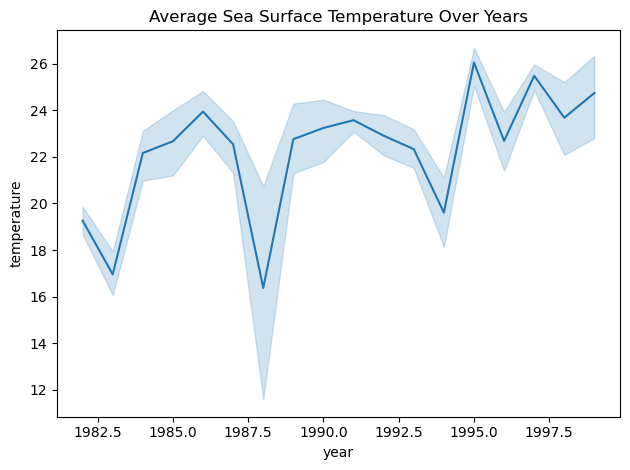

In [131]:
sns.lineplot(x="year",y="temperature",data=df)
plt.title("Average Sea Surface Temperature Over Years")
plt.tight_layout()

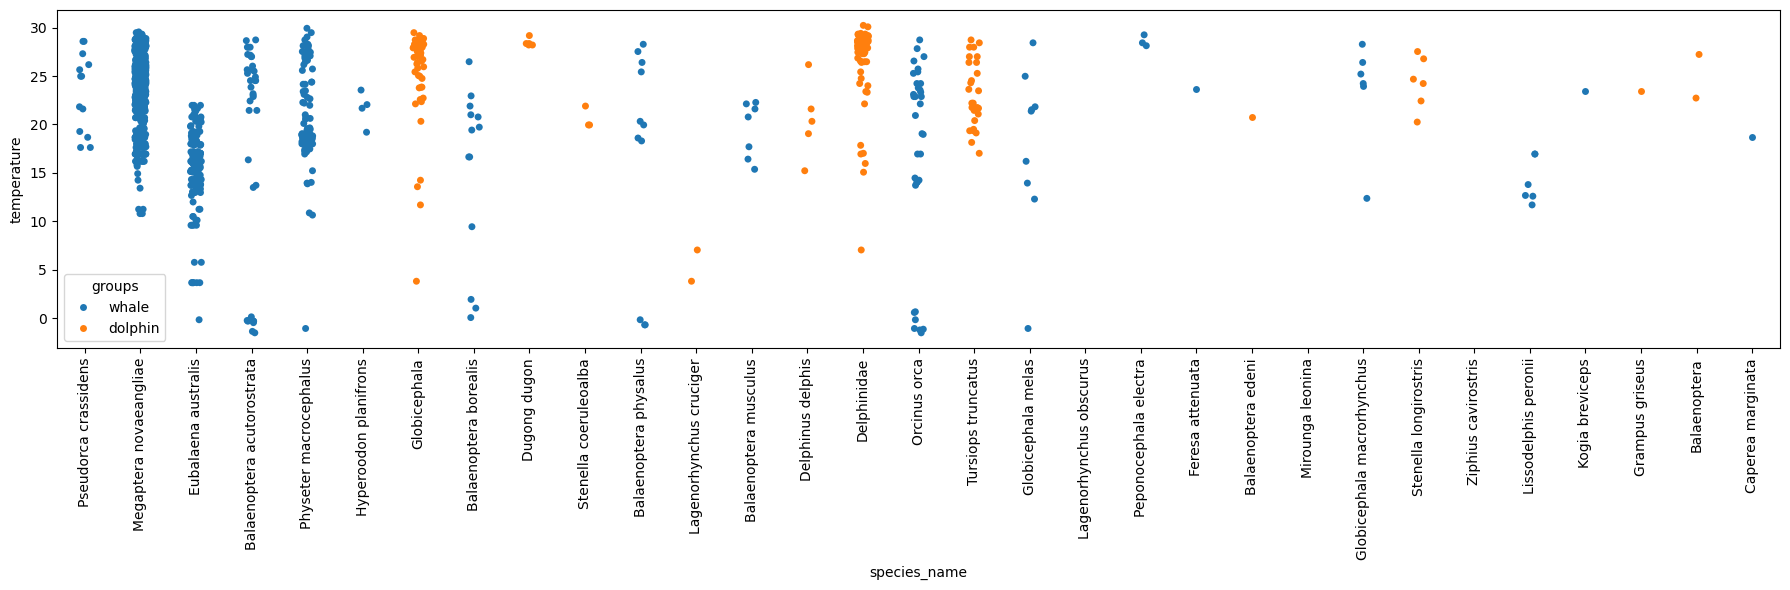

In [133]:
plt.figure(figsize=(18,6))
sns.stripplot(x="species_name",y="temperature",data=df,hue="groups")
plt.xticks(rotation=90)
plt.tight_layout()

In [135]:
fp = df.pivot_table(index="species_name",columns="provider",values="temperature") # For using in heatmap

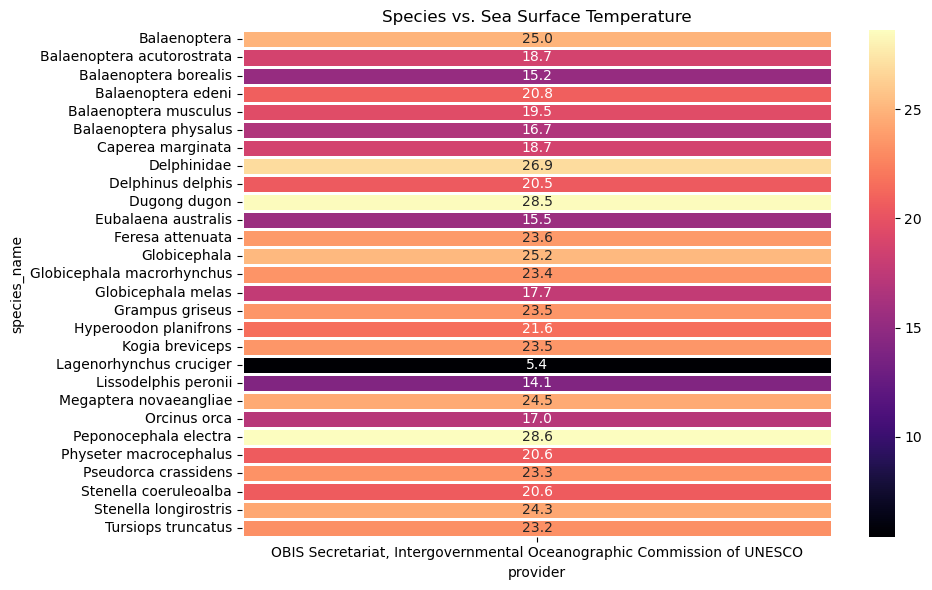

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(fp,cmap="magma",linecolor="white",linewidths=1,annot=True,fmt=".1f")
plt.title("Species vs. Sea Surface Temperature")
plt.tight_layout()
plt.show()

In [139]:
df["temperature"].max()

30.225

In [141]:
df[df["temperature"] == 30.225]["common_name"] # Dolphins tolerated the highest sea surface temperature recorded: 30.225°C

1544    dolphins
Name: common_name, dtype: object

In [143]:
df["temperature"].min()

-1.5

In [145]:
df[df["temperature"] == -1.5]["common_name"] # Killer Whale and Minke Whale were observed at the dataset’s lowest SST: -1.5°C.

1171    Killer Whale
1384     Minke Whale
Name: common_name, dtype: object

In [147]:
species = df[(df["common_name"] == "Killer Whale") | (df["common_name"] == "dolphins") | (df["common_name"] == "Minke Whale")]

In [149]:
species.head()

dataset_id            row_id   latitude   longitude  \
6     103150567  103150567_910519   0.033333  160.833328   
7     103150567  103150567_910520 -77.300003  173.166672   
69    103150567  103150567_910582 -32.016666  115.500000   
94    103150567  103150567_910607  -9.450000  143.500000   
107   103150567  103150567_910620 -46.450001   52.000000   

                   species_name             scientific_name   common_name  \
6    Balaenoptera acutorostrata  Balaenoptera acutorostrata   Minke Whale   
7    Balaenoptera acutorostrata  Balaenoptera acutorostrata   Minke Whale   
69   Balaenoptera acutorostrata  Balaenoptera acutorostrata   Minke Whale   
94                  Delphinidae                 Delphinidae      dolphins   
107                Orcinus orca                Orcinus orca  Killer Whale   

     itis_tsn  group_size  series_id  ...  \
6      180524         NaN        NaN  ...   
7      180524         NaN        NaN  ...   
69     180524         NaN        NaN  ...   
94     180415         NaN        NaN  ...   
107    180469         NaN        NaN  ...   

                                                oceano  notes  \
6    {"SST": {"PF51": {"YEAR": 28.725, "8DAYS": -99...    NaN   
7    {"oid": "103150567_910520", "BATH": {"ETOPO1":...    NaN   
69   {"SST": {"PF51": {"YEAR": 21.45, "8DAYS": -999...    NaN   
94   {"SSH": {"AVISO": {"8DAYS": 111.32}}, "SST": {...    NaN   
107  {"oid": "103150567_910620", "BATH": {"S2004": ...    NaN   

                last_mod   groups           timeStamp  year   month day  \
6    2020-06-30 03:55:39    whale 1992-10-06 12:00:00  1992    Fall   6   
7    2020-06-30 03:55:39    whale 1981-02-17 12:00:00  1981  Winter  17   
69   2020-06-30 03:55:39    whale 1984-08-11 12:00:00  1984  Summer  11   
94   2020-06-30 03:55:39  dolphin 1999-03-12 12:00:00  1999  Spring  12   
107  2020-06-30 03:55:39    whale 1980-12-08 12:00:00  1980  Winter   8   

                                     oceano_dictionary temperature  
6    {'SST': {'PF51': {'YEAR': 28.725, '8DAYS': -99...      28.725  
7    {'oid': '103150567_910520', 'BATH': {'ETOPO1':...         NaN  
69   {'SST': {'PF51': {'YEAR': 21.45, '8DAYS': -999...      21.450  
94   {'SSH': {'AVISO': {'8DAYS': 111.32}}, 'SST': {...      26.850  
107  {'oid': '103150567_910620', 'BATH': {'S2004': ...         NaN  

[5 rows x 27 columns]

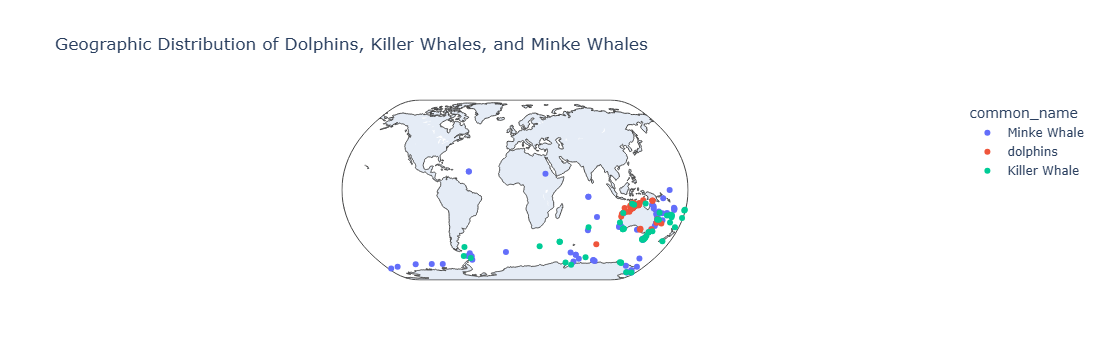

In [151]:
px.scatter_geo(lat="latitude",lon="longitude",color="common_name",data_frame=species,projection="natural earth",title="Geographic Distribution of Dolphins, Killer Whales, and Minke Whales")

In [153]:
# Dolphins were concentrated in tropical waters, Minke Whales in colder southern latitudes, while Killer Whales showed in polar distribution. 

<Axes: xlabel='month', ylabel='temperature'>

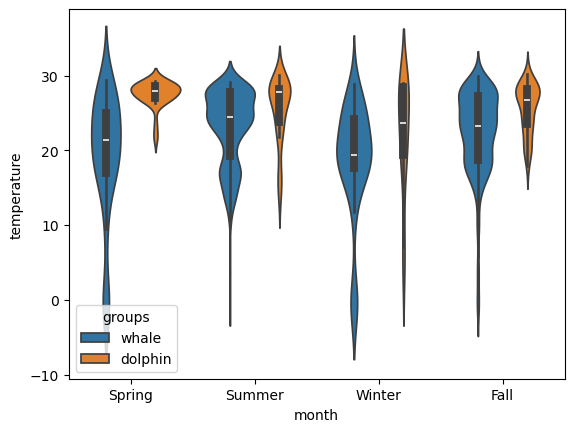

In [155]:
sns.violinplot(x="month",y="temperature",data=df,hue="groups")

In [157]:
# While dolphins are usually observed in warm seasons and warm waters, whales are spread across both warm and cold waters. 
# Especially in winter and spring, whales are seen to have a wider temperature distribution.

Text(0.5, 1.0, 'Temperature vs Latitude for Whales and Dolphins')

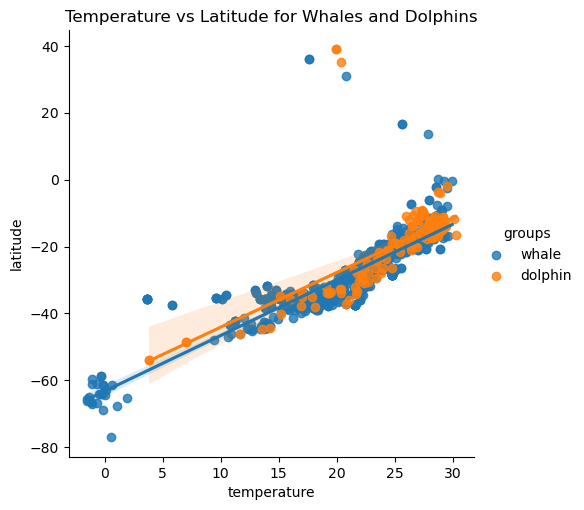

In [160]:
sns.lmplot(x="temperature",y="latitude",data=df,hue="groups")
plt.title("Temperature vs Latitude for Whales and Dolphins")

In [162]:
# This linear model plot shows that both dolphins and whales are observed more frequently at higher temperatures and lower latitudes 
# but dolphins tend to cluster in warmer areas compared to whales."

# BATH ==> Bathymetry

In [165]:
df["oceano_dictionary"].iloc[0]

{'SST': {'PF51': {'YEAR': 27.3, '8DAYS': -9999.0, 'MONTH': 28.95},
  'OISST': {'DAY': 29.19, 'YEAR': 27.11, '8DAYS': 28.99, 'MONTH': 28.55}},
 'oid': '103150567_910513',
 'BATH': {'S2004': -5.0, 'ETOPO1': -5.0},
 'ZONE': {'EEZ': [{'MRGID': 8324,
    'COUNTRY': 'Papua New Guinea',
    'SOVEREIGN': 'Papua New Guinea'}],
  'MEOW': [{'ECO_CODE': 20137, 'PROVINCE': 'Eastern Coral Triangle'}]},
 'obsDate': '1990-04-10',
 'latitude': -9.517,
 'longitude': 147.167}

In [167]:
df["oceano_dictionary"].iloc[0]["BATH"]

{'S2004': -5.0, 'ETOPO1': -5.0}

In [169]:
df["oceano_dictionary"].iloc[10]["BATH"]["S2004"]

-51.0

In [171]:
df["bathymetry"] = df["oceano_dictionary"].apply(lambda bath: bath.get("BATH", {}).get("S2004"))

In [173]:
df["bathymetry"].count()

1635

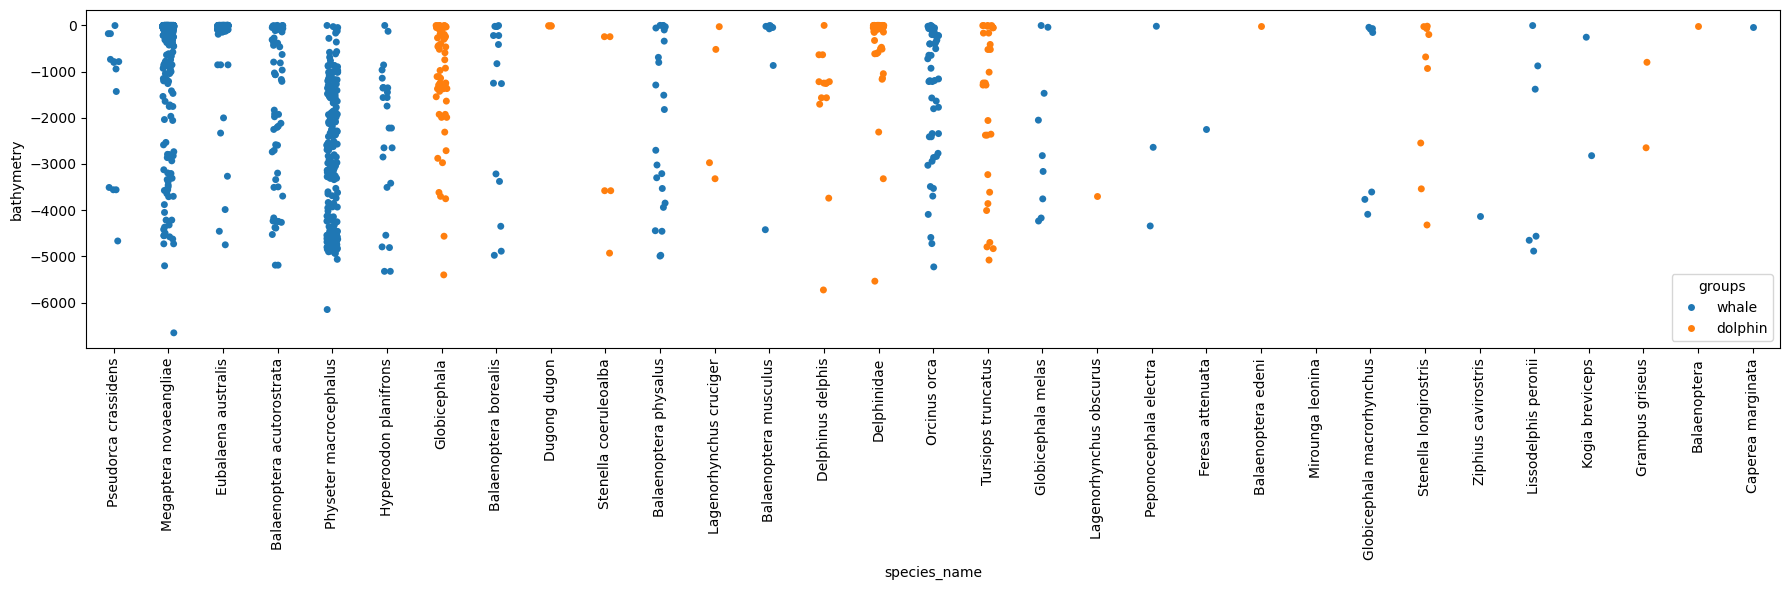

In [175]:
plt.figure(figsize=(18,6))
sns.stripplot(x="species_name",y="bathymetry",data=df,hue="groups")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [176]:
df[df["bathymetry"] == -6655]["species_name"]

905    Megaptera novaeangliae
Name: species_name, dtype: object

In [179]:
fp = df.pivot_table(index="species_name",columns="provider",values="bathymetry")

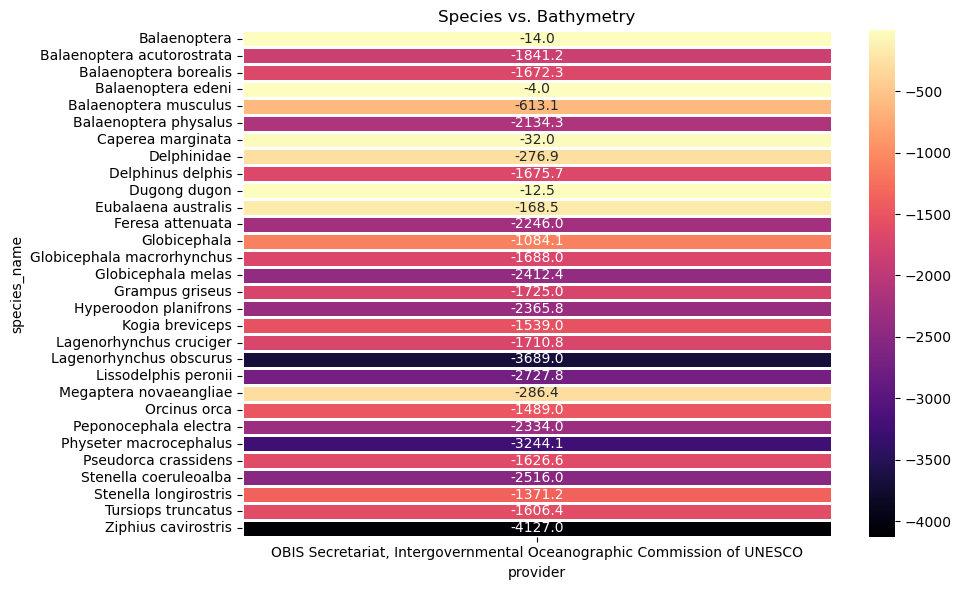

In [181]:
plt.figure(figsize=(10,6))
sns.heatmap(fp,cmap="magma",linecolor="white",linewidths=1,annot=True,fmt=".1f")
plt.title("Species vs. Bathymetry")
plt.tight_layout()
plt.show()

In [183]:
# It reveals that cetaceans such as Ziphuis cavirostris and Lagenorhynchus obscurus are observed in very deep waters, exceeding 3000 meters on average. 
# In contrast, species like Dugong dugon and Balaenoptera edeni inhabit coastal or shallow environments, often less than 50 meters deep.

In [185]:
df[df["species_name"] == "Ziphius cavirostris"] # Cuvier's Beaked Whake is observed in very deep waters and once.

dataset_id            row_id  latitude  longitude         species_name  \
663   103150567  103150567_911176     -56.0       69.0  Ziphius cavirostris   

         scientific_name            common_name  itis_tsn  group_size  \
663  Ziphius cavirostris  Cuvier's Beaked Whale    180498         NaN   

     series_id  ... notes             last_mod groups           timeStamp  \
663        NaN  ...   NaN  2020-06-30 03:55:39  whale 1980-12-29 12:00:00   

     year   month  day                                  oceano_dictionary  \
663  1980  Winter   29  {'oid': '103150567_911176', 'BATH': {'S2004': ...   

     temperature bathymetry  
663          NaN    -4127.0  

[1 rows x 28 columns]

In [187]:
df[df["species_name"] == "Balaenoptera edeni"] # Balaenoptera edeni is observed shallow waters and observed twice.

dataset_id            row_id   latitude   longitude        species_name  \
378    103150567  103150567_910891 -31.883333  152.566666  Balaenoptera edeni   
1553   103150567  103150567_912066 -37.083332  149.916672  Balaenoptera edeni   

         scientific_name   common_name  itis_tsn  group_size  series_id  ...  \
378   Balaenoptera edeni  Eden's whale    180525         NaN        NaN  ...   
1553  Balaenoptera edeni  Eden's whale    180525         NaN        NaN  ...   

     notes             last_mod   groups           timeStamp  year  month  \
378    NaN  2020-06-30 03:55:39  dolphin 1994-11-20 12:00:00  1994   Fall   
1553   NaN  2020-06-30 03:55:39  dolphin 1991-11-30 12:00:00  1991   Fall   

      day                                  oceano_dictionary  temperature  \
378    20  {'SSH': {'AVISO': {'8DAYS': -9999.0}}, 'SST': ...          NaN   
1553   30  {'SST': {'PF51': {'YEAR': 20.775, '8DAYS': -99...       20.775   

     bathymetry  
378         NaN  
1553       -4.0  

[2 rows x 28 columns]